In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
import numpy as np
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import time
from tqdm import tqdm

In [10]:
#Lee HC and Covid
predsb = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovHCRESULTS.csv')
#Lee HC
predsh = pd.read_csv('../../classifiers_results/test_data/BLC_LeeHCRESULTS.csv')
#Lee Covid
predsc = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovRESULTS.csv')

predsb = predsb.set_index('Unnamed: 0')
predsh = predsh.set_index('Unnamed: 0')
predsc = predsc.set_index('Unnamed: 0')

In [11]:
blc_ctpreds = predsb[['ct_pred']]

In [12]:
blc_ctpreds['seperate_ctpred'] = 'X'
blc_ctpreds.loc[blc_ctpreds[blc_ctpreds.index.isin(predsh.index)].index, 'seperate_ctpred'] = predsh.loc[blc_ctpreds[blc_ctpreds.index.isin(predsh.index)].index, 'ct_pred']
blc_ctpreds.loc[blc_ctpreds[blc_ctpreds.index.isin(predsc.index)].index, 'seperate_ctpred'] = predsc.loc[blc_ctpreds[blc_ctpreds.index.isin(predsc.index)].index, 'ct_pred']

/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_63653/4133523094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blc_ctpreds['seperate_ctpred'] = 'X'
/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_63653/4133523094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blc_ctpreds.loc[blc_ctpreds[blc_ctpreds.index.isin(predsh.index)].index, 'seperate_ctpred'] = predsh.loc[blc_ctpreds[blc_ctpreds.index.isin(predsh.index)].index, 'ct_pred']
/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_63653/4133523094.py:3: SettingWithCopyWarnin

In [13]:
blc_mismatch = len(blc_ctpreds[blc_ctpreds.ct_pred != blc_ctpreds.seperate_ctpred])/len(blc_ctpreds)

In [14]:
barplot_blc_mismatch = pd.DataFrame(blc_ctpreds[blc_ctpreds.ct_pred != blc_ctpreds.seperate_ctpred].groupby('ct_pred').size())
barplot_blc_mismatch.loc['pDC'] = 0 #No pDCs were wrong

In [15]:
data_sctype =  '../../classifiers_results/test_data/scType_LeeCovHCRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()

ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])
res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)
inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

resb = res.copy(deep = True)
resb = resb.set_index(['Unnamed: 0'])

data_sctype =  '../../classifiers_results/test_data/scType_LeeHCRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()

ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])
res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)
inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

resh = res.copy(deep = True)
resh = resh.set_index(['Unnamed: 0'])

data_sctype =  '../../classifiers_results/test_data/scType_LeeCovRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()

ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])
res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)

inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']



resc = res.copy(deep = True)
resc = resc.set_index(['Unnamed: 0'])

In [16]:
sctype_ctpreds = resb[['ct_pred']]
sctype_ctpreds['tog_ctpred'] = 'X'


/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_63653/3340017132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sctype_ctpreds['tog_ctpred'] = 'X'


In [17]:
sctype_ctpreds.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resh.index)].index, 'tog_ctpred'] = resh.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resh.index)].index, 'ct_pred']
sctype_ctpreds.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resc.index)].index, 'tog_ctpred'] = resc.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resc.index)].index, 'ct_pred']

/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_63653/738202795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sctype_ctpreds.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resh.index)].index, 'tog_ctpred'] = resh.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resh.index)].index, 'ct_pred']
/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_63653/738202795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sctype_ctpreds.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resc.index)].index, 'tog_ctpred'] = resc.loc[sctype_ctpreds[sctype_ctpreds.index.isin(resc.index)].index, 'ct_pred']


In [18]:
sctype_mismatch = len(sctype_ctpreds[sctype_ctpreds.ct_pred != sctype_ctpreds.tog_ctpred])/len(sctype_ctpreds)

In [20]:
barplot_sctype_mismatch = pd.DataFrame(sctype_ctpreds[sctype_ctpreds.ct_pred != sctype_ctpreds.tog_ctpred].groupby('ct_pred').size())

In [21]:
barplot_sctype_mismatch = barplot_sctype_mismatch.reset_index()
barplot_blc_mismatch = barplot_blc_mismatch.reset_index()

In [22]:
barplot_blc_mismatch['classifier'] = 'BLC'
barplot_sctype_mismatch['classifier'] = 'scType'

In [23]:
df_barplot = pd.concat([barplot_blc_mismatch, barplot_sctype_mismatch])

In [24]:
ct_sizes = resb.groupby('CellType').size()

In [25]:
ct_dic = {}
for i,size in enumerate(ct_sizes):
    ct_dic[ct_sizes.index[i]] = size


In [27]:
newv = []
for i in range(len(df_barplot)):
    newv += [1 - (df_barplot.iloc[i][0] / ct_dic[df_barplot.iloc[i]['ct_pred']])]

In [28]:
df_barplot['% Coherent Annotations'] = newv

In [29]:
df_barplot['% Coherent Annotations'] = df_barplot['% Coherent Annotations']*100

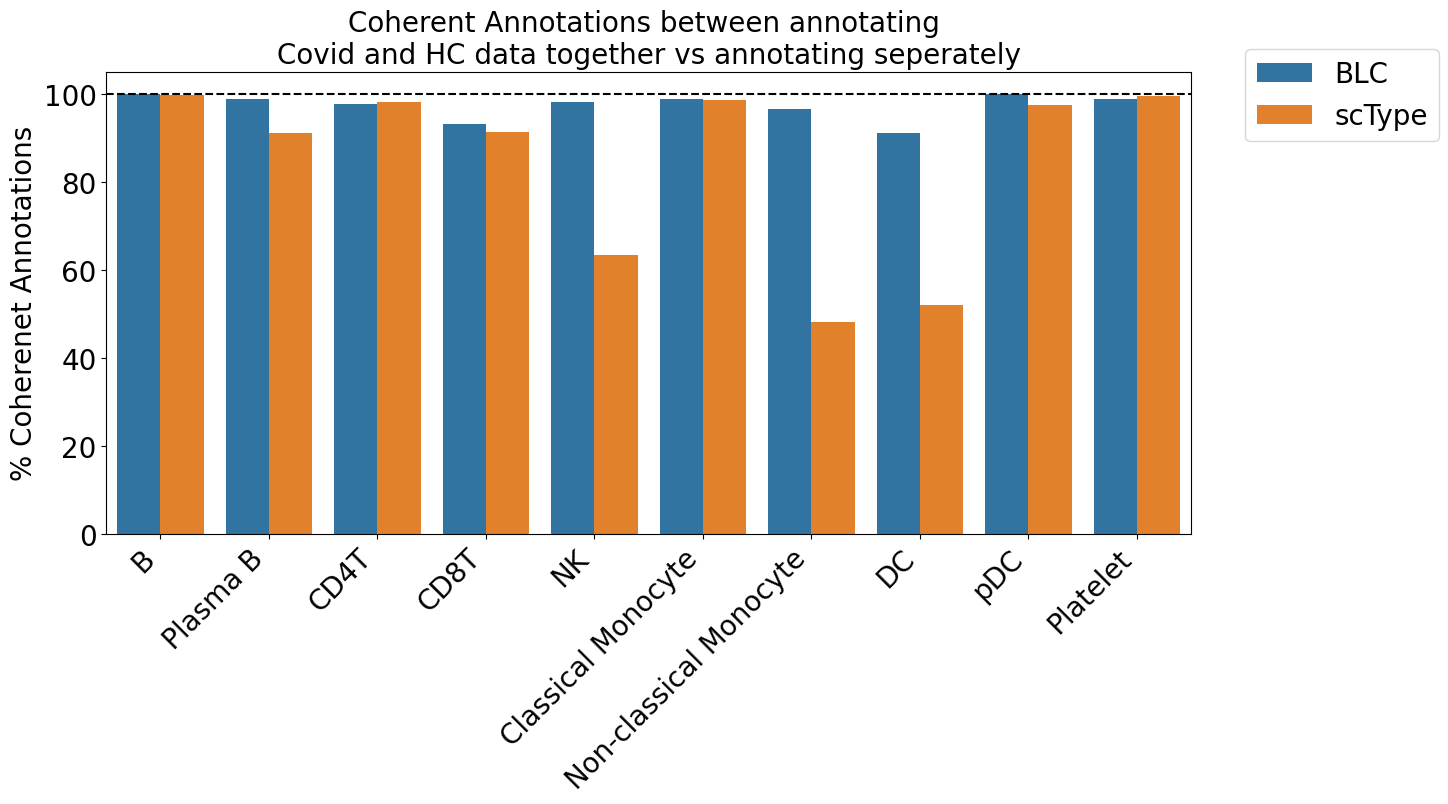

In [30]:
plt.figure(figsize = (14,6))
sns.barplot(df_barplot, y = '% Coherent Annotations', x = 'ct_pred', hue = 'classifier', order = ['B', 'Plasma B', 'CD4T', 'CD8T', 'NK', 'Classical Monocyte', 'Non-classical Monocyte', 'DC', 'pDC', 'Platelet'])
plt.xticks(rotation = 45, size = 20, ha = 'right')
plt.xlabel('')
plt.ylabel('% Coherenet Annotations', size  = 20)
plt.title('Coherent Annotations between annotating \nCovid and HC data together vs annotating seperately', size  = 20)
plt.yticks(size = 20)

plt.legend(loc = [1.05,0.85], prop={'size': 20})
plt.axhline(100, color = 'black', ls = '--')
#plt.savefig('Barplot_coherentAnnotations.svg', bbox_inches = 'tight', dpi = 200)

In [31]:
tobarplot = pd.DataFrame({'missmatch': [np.round(blc_mismatch*100, 0), np.round(sctype_mismatch*100, 0)], 'classifier':['BLC', 'scType']})

In [32]:
tobarplot['missmatch'] = tobarplot['missmatch'].astype(int)

/var/folders/vm/qd7pm6ts2lggn9n80c60p4sr0000gn/T/ipykernel_63653/3053852275.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ax.get_yticklabels(), size = 15)


Text(0.5, 1.0, '% of cells with incoherent annotations')

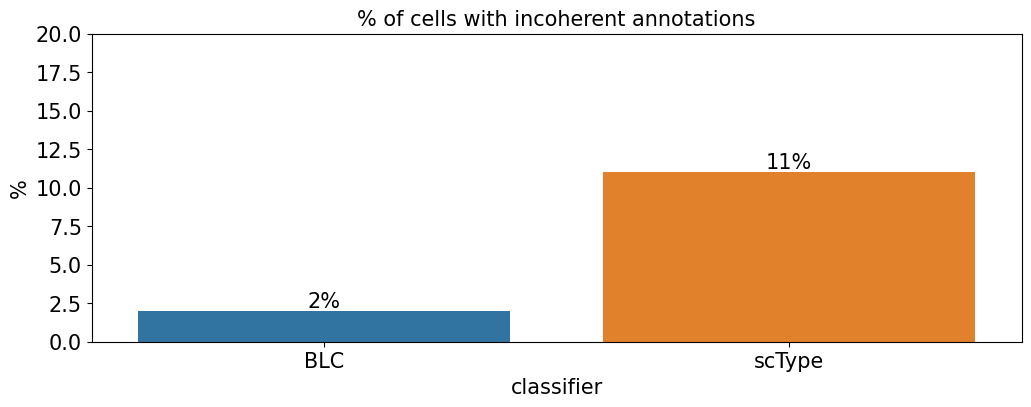

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))

# add the plot
sns.barplot(tobarplot, x = 'classifier', y = 'missmatch', ax = ax)#, palesctype_ctpredse = 'Blues' )

labels = [f'{value:.0f}%' for value in tobarplot.missmatch]
# Apply custom labels to the bars
ax.bar_label(ax.containers[-1], labels=labels, label_type='edge', size=15)

# add the annotation
#ax.bar_label(ax.containers[-1], fmt='%.f', label_type='edge', size = 15)
ax.set_ylim(0, 20)
ax.set_ylabel('%', fontsize = 15)
ax.set_xlabel('classifier', size = 15)
ax.set_xticklabels(labels = ['BLC', 'scType'], size = 15)
ax.set_yticklabels(labels = ax.get_yticklabels(), size = 15)
ax.set_title('% of cells with incoherent annotations', fontsize = 15)
#plt.savefig('mismatched_annotations.svg', dpi =200)